<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana7/Notebooks/Verosimilitud%20y%20distribuci%C3%B3n%20previa%20conjugada%20para%20Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$P(p\mid s) = \frac{P(s\mid p)~~P(p)}{P(s)}$

donde 

 $p$ es el parametro que define a una distribución bernoulli 

 $P(s\mid p)$ es la verosimilitud

 $P(p)$ es la distribución a priori

 $P(s)$ es la probabilidad de obtener la  muestra dada

 $P(p\mid s)$   es la distribución a posteriori



In [1]:
import numpy as np
from numpy import exp

import matplotlib.pyplot as plt

considere la siguiente muestra

In [2]:
# Bernoulli n = 1
n, p = 1, 0.5
size = 7

#np.random.seed(7)
s = np.random.binomial(n, p, size)  #muestra de tamaño size con la preferencia de el candidato con .3
s

array([0, 0, 0, 1, 0, 1, 0])

# Verosimilitud

¿qué tanto  podemos pensar que es justa una moneda (bernulli, p = 0.5) después de varios lanzamientos?

$P(s\mid p) = (1-p)^{fracasos} p^{exitos} $


 

In [3]:
def Ps_p(s, p):
  exitos = np.count_nonzero(s)
  fracasos = len(s)- exitos
  
  Ps_p = pow(1-p, fracasos)* pow(p, exitos)
  return Ps_p

In [4]:
Ps_p(s, 0.5)

0.0078125

In [6]:
Ps_p(s, 0.3)

0.015126299999999994

In [7]:
Ps_p(s, 0.2)

0.013107200000000006

In [5]:
Ps_p(s, 0.6)

0.0036864000000000007

#[Distribución previa conjugada](https://en.wikipedia.org/wiki/Conjugate_prior)


In [8]:
from scipy.stats import beta

In [9]:
s

array([0, 0, 0, 1, 0, 1, 0])

In [10]:
exitos = s.sum()
fracasos = len (s) - exitos

exitos, fracasos

(2, 5)

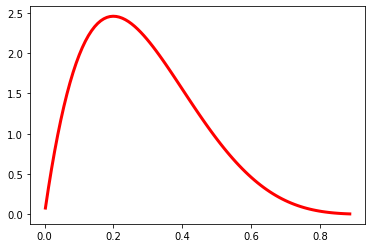

In [11]:
a = exitos     # éxitos
b = fracasos     # fallas 
x = np.linspace(beta.ppf(0.0001, a, b),
                beta.ppf(0.9999, a, b), 100)
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf, 'r-', lw=3)
plt.show()



# Incorporación de evidencia y distribución a posteriori



In [12]:
a, b

(2, 5)

In [13]:
s2 = np.random.binomial(n, p, 20)

In [14]:
s2

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [19]:
# exitos, fracasos en s2
s2.sum(), len(s2)-s2.sum()

(12, 8)

In [15]:
def alfa_beta_post(nuevos_datos, prior_a, prior_b):
    
    post_a = prior_a + np.sum(nuevos_datos)
    post_b = prior_b + len(nuevos_datos)-np.sum(nuevos_datos)
       
    return post_a, post_b

In [16]:
a, b = alfa_beta_post(s2, 3, 2 )
a, b

(15, 10)

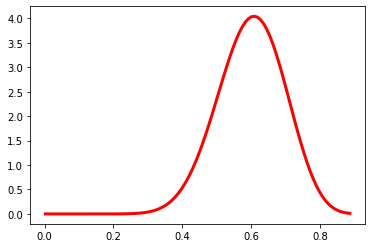

In [17]:
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf, 'r-', lw=3)
plt.show()